In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [4]:
# code settings
pd.set_option('display.max_columns', None)

# visualization settings
plt.rc('figure', figsize=(9,9))
sns.set_style('darkgrid')

In order to determine which test to use, must determine if the data is normally distributed

- We'll default to a shapiro-wilk test and K^2 test

In [5]:
regression_short = pd.read_csv('../data/processed/regression_short.csv')
price = pd.read_csv('../data/interim/price_taxes.csv')
health = pd.read_csv('../data/interim/health.csv')

To-Do:
- Preform feature selection
    * Lasso regression
- Find 1 more stat test
- Write up 
- Clean up notebooks

Statistical Test:

- Regression
- Pearson's correlation
    * Does higher milk/soda ratio correlate pct obsese adult?
- ANOVA
- Calculate CI

In [6]:
def test_normality(df, feat_col):
    
    alpha = 0.05
    
    sns.kdeplot(df[feat_col], label=feat_col)
    plt.show()
    
    # Shapiro-Wilk test
    stat_sw, p_sw = stats.shapiro(df[feat_col])
    
    print('Sharpio-Wilk Test:\nStatistic=%.4f, p=%.4f' % (stat_sw, p_sw))
    
    if p_sw > alpha:
        print('Fail to reject H0, normally distributed')
    else:
        print('Reject H0, not normally distributed')
        
    # D'Agostino K^2
    stat_da, p_da = stats.normaltest(df[feat_col])
    
    print('\nD\'Agostino Test:\nStatistic=%.4f, p=%.4f' % (stat_sw, p_sw))
    
    if p_da > alpha:
        print('Fail to reject H0, normally distributed')
    else:
        print('Reject H0, not normally distributed')

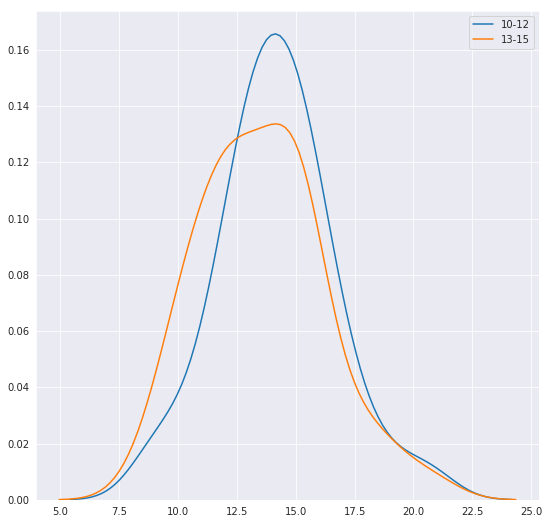

In [7]:
sns.kdeplot(regression_short['state_FOODINSEC_10_12'], label='10-12')
sns.kdeplot(regression_short['state_FOODINSEC_13_15'], label='13-15')
plt.legend()

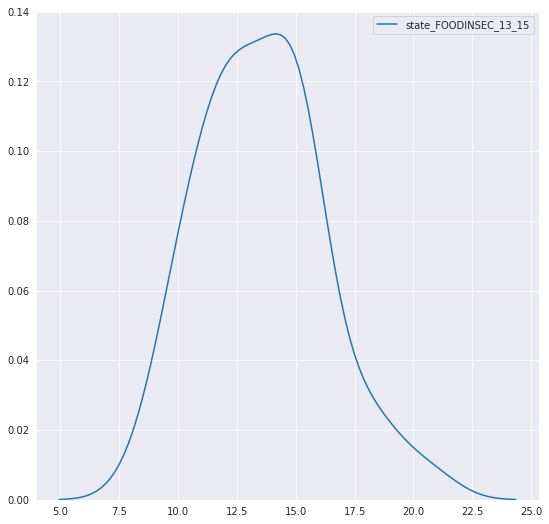

Sharpio-Wilk Test:
Statistic=0.9777, p=0.4450
Fail to reject H0, normally distributed

D'Agostino Test:
Statistic=0.9777, p=0.4450
Fail to reject H0, normally distributed


In [45]:
test_normality(regression_short, 'state_FOODINSEC_13_15')

Difference between food insecurity

- Parametric, 2 groups -> Paired t-test
- Means
- Did variance change too?

In [50]:
stat, p = stats.ttest_rel(regression_short['state_FOODINSEC_10_12'],
                          regression_short['state_FOODINSEC_13_15'])


stat, p

(2.878865632380211, 0.005858791185468704)

In [11]:
a = regression_short[['state_FOODINSEC_10_12', 'state_FOODINSEC_13_15']].describe()
a

,state_FOODINSEC_10_12,state_FOODINSEC_13_15
count,51.000000,51.000000
mean,14.182353,13.549020
std,2.430284,2.621631
min,8.700000,8.500000
25%,12.800000,11.650000
50%,14.100000,13.200000
75%,15.500000,15.050000
max,20.900000,20.800000


In [16]:
a.loc['mean', 'state_FOODINSEC_10_12'] - a.loc['mean', 'state_FOODINSEC_13_15']

0.6333333333333346

Significance difference in means. Decrease of 0.6333

    * Does higher milk/soda ratio correlate pct obsese adult?

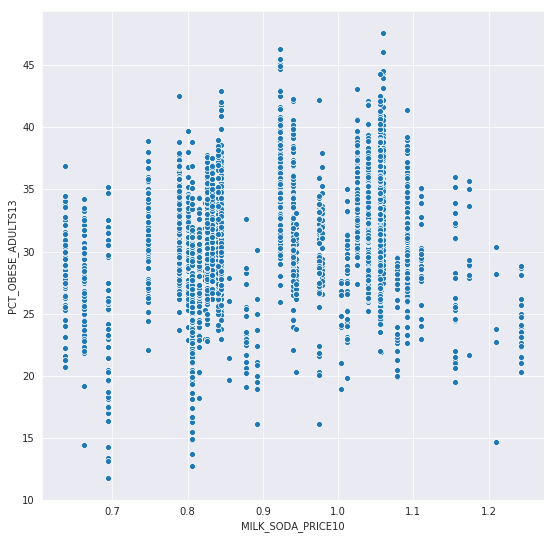

In [9]:
sns.scatterplot(x=price['MILK_SODA_PRICE10'], y=health['PCT_OBESE_ADULTS13'])

In [10]:
corr_df = pd.DataFrame()

corr_df['PCT_OBESE_ADULTS13'] = health['PCT_OBESE_ADULTS13']
corr_df['MILK_SODA_PRICE10'] = price['MILK_SODA_PRICE10']

corr_df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


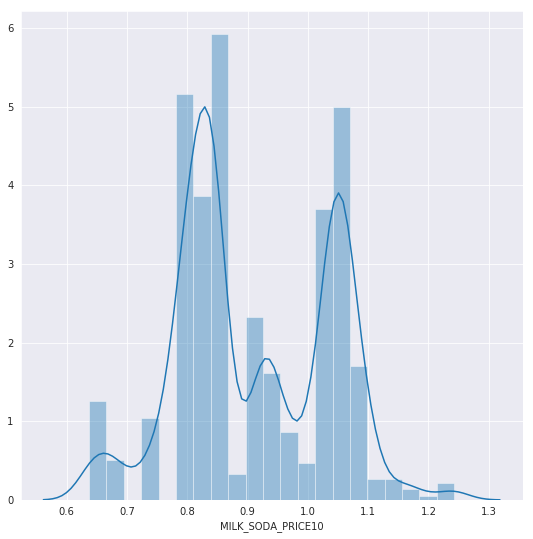

In [11]:
sns.distplot(corr_df['MILK_SODA_PRICE10'])

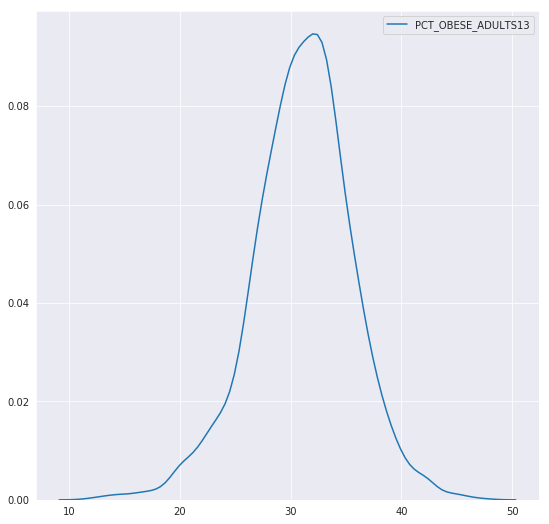

Sharpio-Wilk Test:
Statistic=0.9903, p=0.0000
Reject H0, not normally distributed

D'Agostino Test:
Statistic=0.9903, p=0.0000
Reject H0, not normally distributed


In [20]:
test_normality(corr_df, 'PCT_OBESE_ADULTS13')

In [22]:
stats.multivariate_normal(corr_df)

ValueError: Array 'mean' must be a vector of length 6216.

In [13]:
stats.pearsonr(corr_df['MILK_SODA_PRICE10'], corr_df['PCT_OBESE_ADULTS13'])

(0.1714136358829887, 6.351733581275116e-22)

In [14]:
stats.spearmanr(corr_df['MILK_SODA_PRICE10'], corr_df['PCT_OBESE_ADULTS13'])

SpearmanrResult(correlation=0.167802529116508, pvalue=4.598246152076621e-21)

In [17]:
5712*12

68544